In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [ ]:
print(labels[:,:4])
print(labels.shape)
print(type(labels[0][5]))
print(labels[1][5])

[['artifact' 'entity' 'animal' 'animal']
 ['instrumentality' 'round shape' 'vertebrate' 'vertebrate']
 ['equipment' 'sphere' 'mammal' 'amphibian']
 ['croquet ball' 'bubble' 'komondor' 'tailed frog']]
(4, 1750)
<class 'numpy.str_'>
invertebrate


In [ ]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [ ]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [ ]:
print(dat["responses"].shape)
print(dat["responses"].shape[0])

(1750, 8428)
1750


In [ ]:
vec_avg = np.zeros_like(dat["responses"])
for sti, idx_resp in zip(dat['responses'],enumerate(dat["responses"],0)):
  vec_avg[idx_resp] = np.mean(sti)

IndexError: ignored

This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [ ]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

{'LatOcc': 928,
 'Other': 0,
 'V1': 1294,
 'V2': 2083,
 'V3': 1790,
 'V3A': 484,
 'V3B': 314,
 'V4': 1535}

Each stimulus is a 128 x 128 grayscale array:

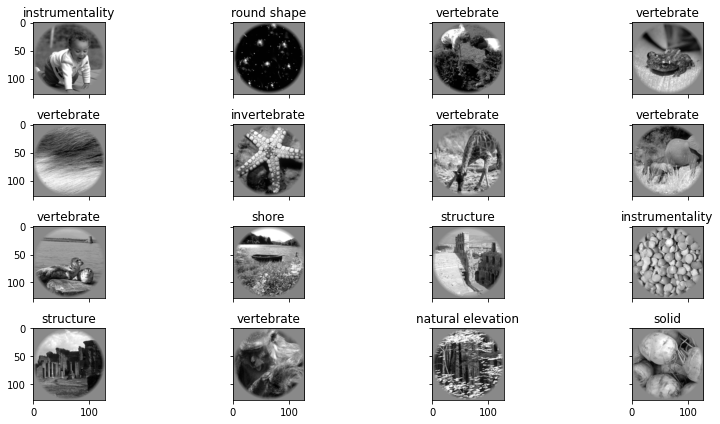

In [ ]:
f, axs = plt.subplots(4, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[1,:]):
  ax.imshow(im, cmap="gray")
  ax.set_title(lbl)
f.tight_layout()

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

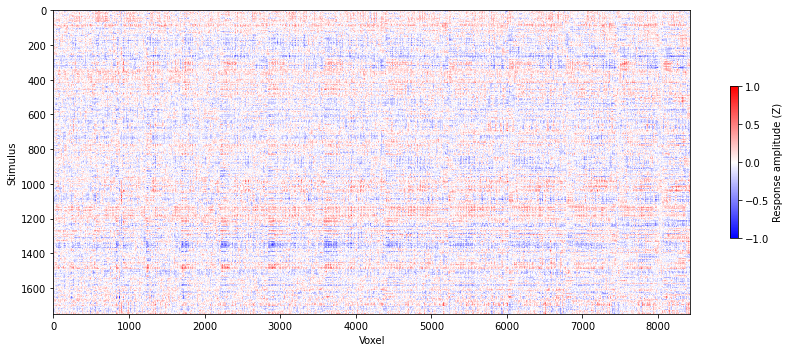

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

The training/validation splits from the original paper are retained, so the 120 test stimuli and responses are in separate data structures:

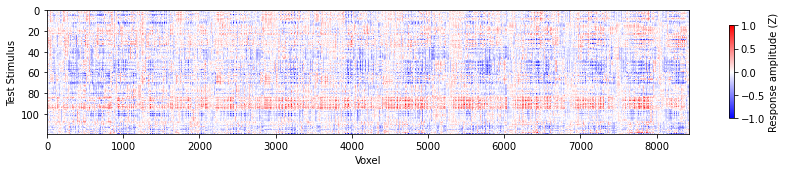

In [ ]:
f, ax = plt.subplots(figsize=(12, 2.5))
ax.set(xlabel="Voxel", ylabel="Test Stimulus")
heatmap = ax.imshow(dat["responses_test"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
f.tight_layout()

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=7, random_state=2020) 

In [ ]:
responses = dat["responses"]


In [ ]:

embed = tsne_model.fit_transform(responses)
print(embed.shape)

(1750, 2)


In [ ]:
cat_labels = labels[1,:]

cat_cat = np.unique(cat_labels)
print(cat_cat)

idxs = np.zeros_like(np.unique(cat_labels))
values = np.zeros_like(np.unique(cat_labels))
print(cat_cat.shape, idxs.shape, values.shape)

for counter, value in enumerate(cat_cat):
    idxs[counter] = counter
    values[counter] = value

dic = dict(zip(values,idxs))

labels_int = np.zeros_like(cat_labels)
labels_int = [dic[item] for item in cat_labels]
labels_int = np.array(labels_int).astype(np.int)
print(labels_int)


['acorn' 'cliff' 'commodity' 'covering' 'creation' 'decoration' 'ear'
 'earthstar' 'edible fruit' 'explorer' 'fabric' 'gyromitra'
 'hen-of-the-woods' 'hip' 'instrumentality' 'invertebrate'
 'natural depression' 'natural elevation' 'round shape' 'seed' 'sheet'
 'shore' 'solid' 'spring' 'structure' 'substance' 'surface'
 'vascular plant' 'vertebrate' 'visual signal']
(30,) (30,) (30,)
[14 18 28 ... 24 24 14]


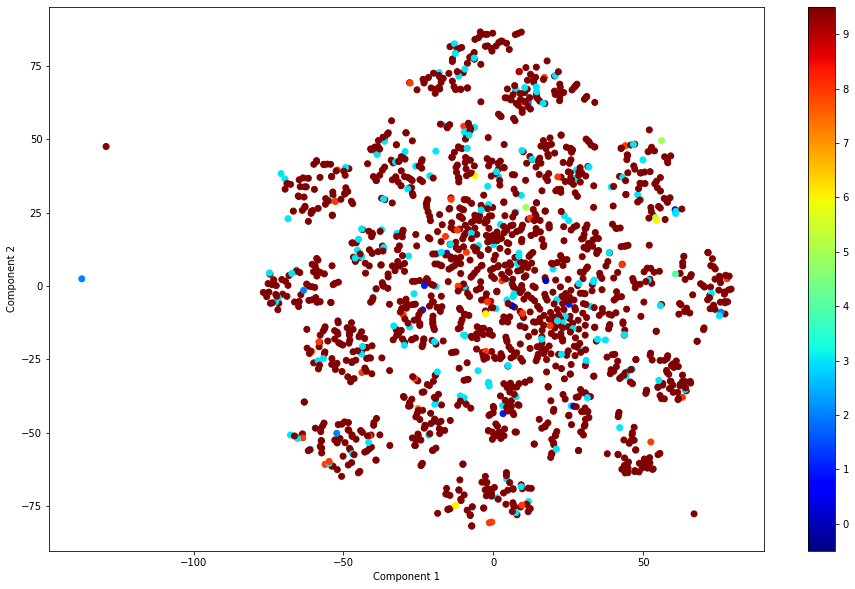

In [ ]:
plt.figure(figsize=(16,10))
cmap = plt.cm.jet
plt.scatter(x=embed[:,0], y=embed[:,1], c=labels_int,cmap=cmap)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(ticks=range(30))
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2) # Initializes PCA
pca_model.fit(responses) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Perform PCA 
scores = pca_model.transform(responses)

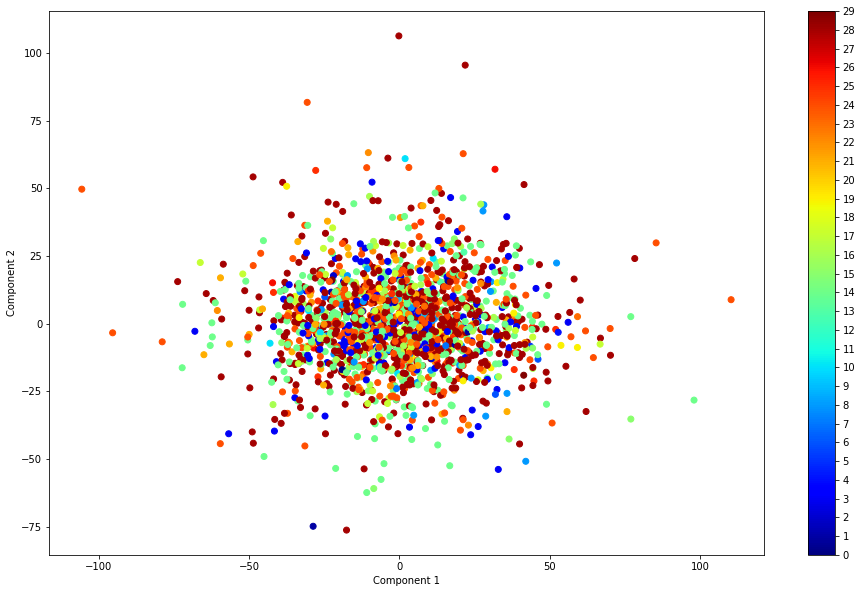

In [ ]:
# Plot the data and reconstruction
plt.figure(figsize=(16,10))
cmap = plt.cm.jet
plt.scatter(x=scores[:,0], y=scores[:,1], c=labels_int,cmap=cmap)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(ticks=range(30))
# plt.clim(-0.5, 9.5)
  
plt.show()

In [ ]:
pca_model_nd = PCA(n_components=5) # Initializes PCA
pca_model_nd.fit(responses) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Perform PCA 
scores_nd = pca_model_nd.transform(responses)

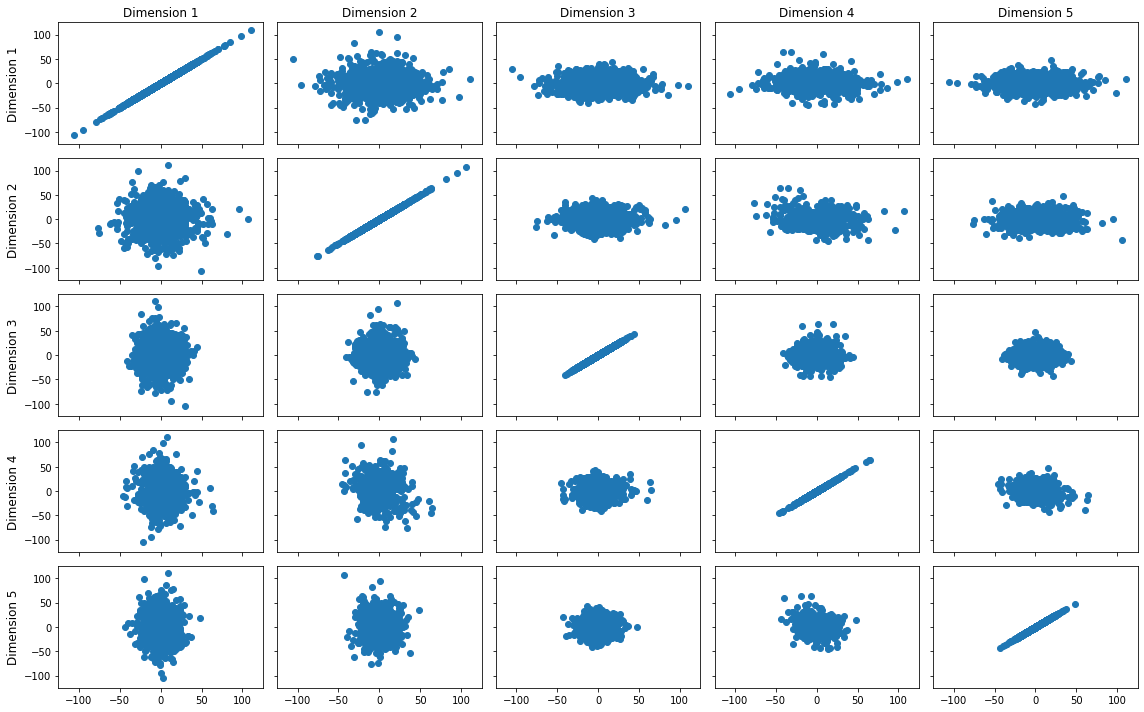

In [ ]:
# Plotting the first n_components dimensions:
f, axs = plt.subplots(5, 5, figsize=(16, 10), sharex=True, sharey=True)
for a in range(5):
  for b in range(5):
    axs[a,b].scatter(x=scores_nd[:,a], y=scores_nd[:,b])
    axs[a,b].set_xlim([-125,125])
    axs[a,b].set_ylim([-125,125])
    # axs[a,b].clim(-0.5, 9.5)

cols = ['Dimension {}'.format(col) for col in range(1,6)]
rows = ['Dimension {}'.format(row) for row in range(1,6)]

for ax, col in zip(axs[0], cols):
    ax.set_title(col)
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
    
f.tight_layout()
plt.show()

In [ ]:
def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y

def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Vector of eigenvalues
    (numpy array of floats)    : Corresponding matrix of eigenvectors

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals

score, evectors, evals = pca(responses)

# plot the eigenvalues


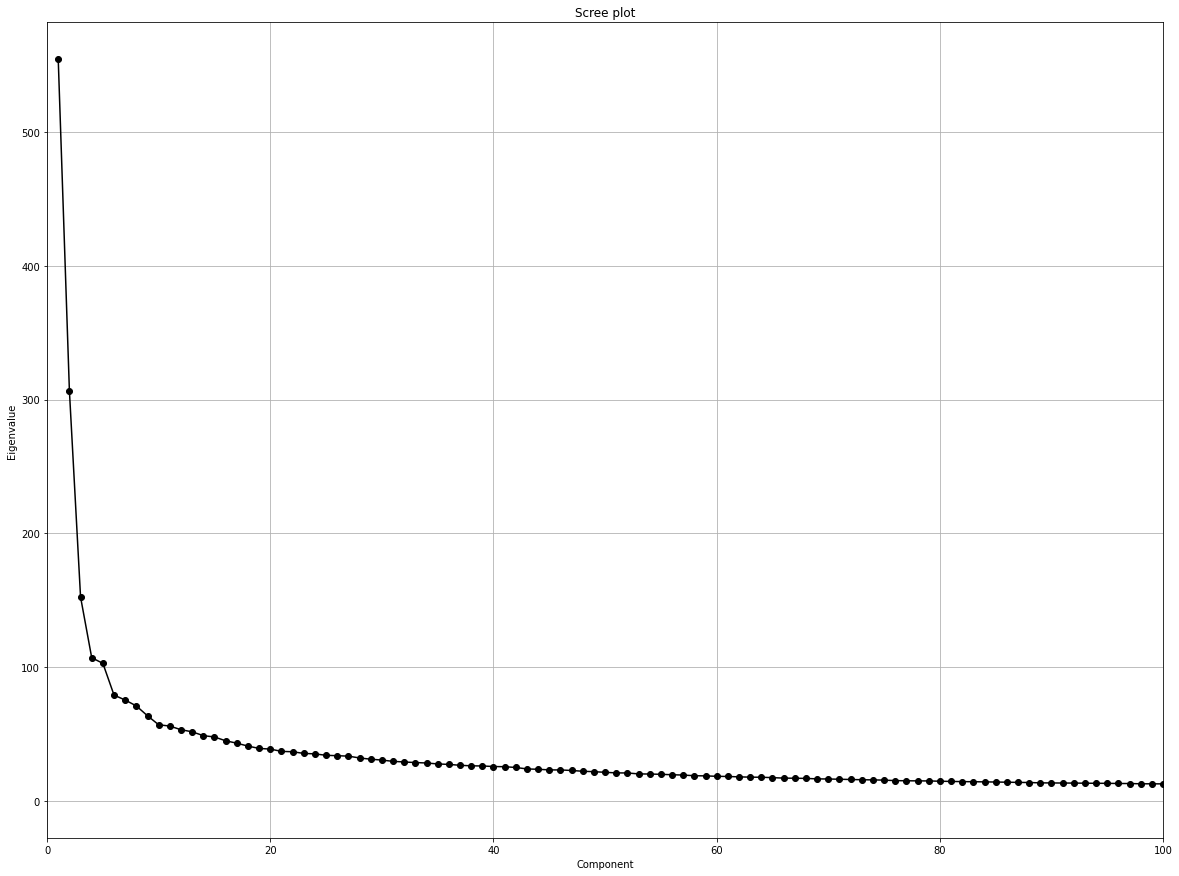

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.xlim([0, 100])
plt.grid()
plt.show()
